In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [321]:
test = pd.read_csv("Tests.csv", sep=';')

In [323]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3148 entries, 0 to 3147
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TestId     3148 non-null   object
 1   RawDataId  3148 non-null   object
 2   Date       3148 non-null   object
 3   Time       3148 non-null   object
 4   Systolic   3148 non-null   int64 
 5   Diastolic  3148 non-null   int64 
 6   MAP        3148 non-null   int64 
 7   HR         3148 non-null   int64 
 8   PP         3148 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 221.5+ KB


In [325]:
completos = pd.read_csv("Completos.csv", sep=';')

In [327]:
df_unido = pd.merge(test, completos, on='TestId', how='right')

In [329]:
df_unido.shape

(4845, 32)

- Luego de subir dos csv lo que hicimos fue unirlos en uno desde la key TestId.
- En esta etapa seguimos con ver las columnas que poseen los unidos, para seleccionar los que usaremos para el análisis.

In [332]:
df_unido.columns

Index(['TestId', 'RawDataId', 'Date', 'Time', 'Systolic', 'Diastolic', 'MAP',
       'HR', 'PP', 'PatientId', 'Interpretation', 'HookupStartTime',
       'HookupEndTime', 'SystolicMax', 'SystolicMin', 'DiastolicMax',
       'DiastolicMin', 'MAPMax', 'MAPMin', 'PPMax', 'PPMin', 'HRMax', 'HRMin',
       'Duration', 'SuccessfullReading', 'PercentSuccessfullReading',
       'SysDipping', 'DiaDipping', 'MapDipping', 'Age', 'GenderId',
       'BirthDate'],
      dtype='object')

In [334]:
df_limpio = df_unido[['TestId', 'RawDataId', 'Date', 'Time', 'Systolic', 'Diastolic', 'MAP',
       'HR', 'PP', 'PatientId', 'Interpretation', 'HookupStartTime',
       'HookupEndTime', 'Duration', 'SuccessfullReading', 'PercentSuccessfullReading',
       'SysDipping', 'DiaDipping', 'MapDipping', 'Age', 'GenderId',
       'BirthDate']]

In [336]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TestId                     4845 non-null   object 
 1   RawDataId                  3148 non-null   object 
 2   Date                       3148 non-null   object 
 3   Time                       3148 non-null   object 
 4   Systolic                   3148 non-null   float64
 5   Diastolic                  3148 non-null   float64
 6   MAP                        3148 non-null   float64
 7   HR                         3148 non-null   float64
 8   PP                         3148 non-null   float64
 9   PatientId                  4845 non-null   object 
 10  Interpretation             4798 non-null   object 
 11  HookupStartTime            4845 non-null   object 
 12  HookupEndTime              4845 non-null   object 
 13  Duration                   4845 non-null   objec

In [338]:
df_limpio['PercentSuccessfullReading'].describe()

count     4845
unique      62
top        98%
freq      1080
Name: PercentSuccessfullReading, dtype: object

#### El análisis univariado es fundamental para entender las características básicas de los datos antes de proceder a análisis más complejos como el análisis bivariado o multivariado.

Porcentaje de cada género de paciente obtenidos de los datos obtenidos

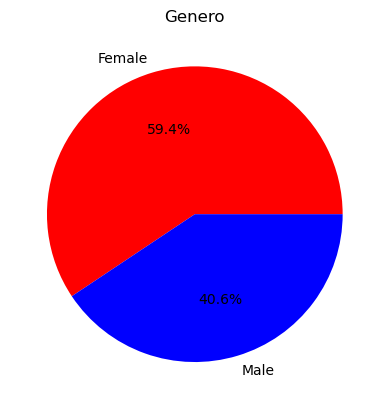

In [347]:
gender_counts = df_limpio["GenderId"].value_counts()
gender = ["Female", "Male"]
colors = ["r", "b"]
plt.title("Genero")
plt.pie(gender_counts, labels = gender, colors = colors, autopct='%1.1f%%')
plt.show()

#### El método describe proporciona un resumen estadístico de las columnas numéricas de los datos obtenidos. Este resumen incluye varias estadísticas descriptivas univariadas, tales como:
- Count: El número de valores no nulos.
- Mean: La media aritmética de los valores.
- Std: La desviación estándar, que mide la dispersión de los valores respecto a la media.
- Min: El valor mínimo.
- 25%: El primer cuartil, que es el valor por debajo del cual se encuentra el 25% de los datos.
- 50%: La mediana o segundo cuartil, que es el valor central.
- 75%: El tercer cuartil, que es el valor por debajo del cual se encuentra el 75% de los datos.
- Max: El valor máximo.

In [413]:
df_limpio.describe()


,Systolic,Diastolic,MAP,HR,PP,SuccessfullReading,Age
count,3148.000000,3148.000000,3148.000000,3148.000000,3148.000000,4845.000000,4845.000000
mean,129.380241,78.152795,95.597205,72.770330,51.227446,58.155624,59.297007
std,19.632757,14.632187,15.551684,14.130255,11.899259,7.861107,16.777024
min,75.000000,38.000000,54.000000,33.000000,17.000000,1.000000,9.000000
25%,116.000000,68.000000,85.000000,63.000000,43.000000,54.000000,47.000000
50%,128.000000,77.000000,95.000000,71.000000,50.000000,60.000000,61.000000
75%,141.000000,88.000000,105.250000,81.000000,59.000000,64.000000,73.000000
max,206.000000,134.000000,155.000000,186.000000,102.000000,74.000000,123.000000


#### Analálisis univariado sobre los tangos etarios obtenido de los datos de pacientes.

/tmp/ipykernel_67294/1513118636.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['AgeRange'] = pd.cut(df_limpio['Age'], bins=bins, labels=labels, right=False)


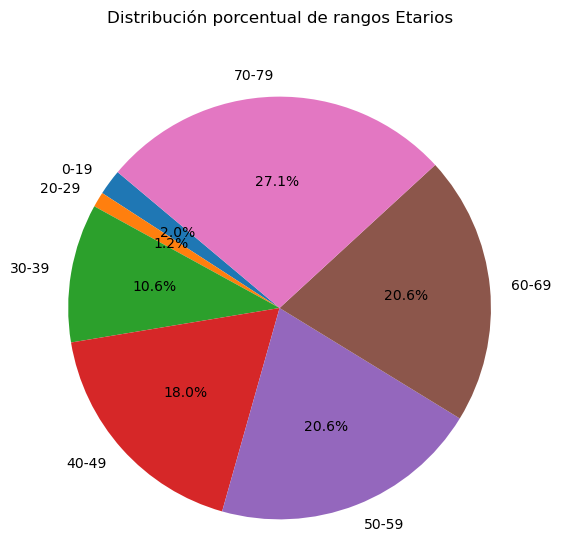

In [407]:
# Definir los rangos etarios:
bins = [0, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']

# Agrupar las edades en los rangos definidos:
df_limpio['AgeRange'] = pd.cut(df_limpio['Age'], bins=bins, labels=labels, right=False)

#Contar cuántas personas hay en cada rango:
age_counts = df_limpio['AgeRange'].value_counts(sort=False)

#Calcular los porcentajes:
age_counts_percentage = 100 * age_counts / age_counts.sum()

plt.figure(figsize=(6, 6))
plt.pie(age_counts_percentage, labels=age_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución porcentual de rangos Etarios', y=1.1)
plt.axis('equal') 
plt.show()

#### La Moda, Media y Mediana de los datos de edades.
Este gráfico nos muestra La moda es el valor que aparece con mayor frecuencia en un conjunto de estos datos. La media muestra la suma de todos los valores en un conjunto de datos edades dividida por el número de valores en ese conjunto La mediana es el valor medio de un conjunto de estos datos. 

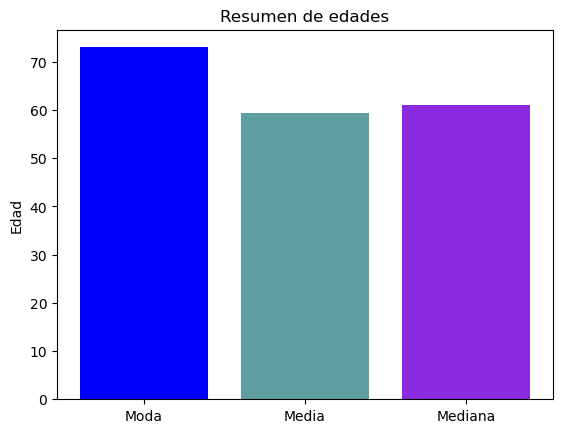

In [376]:
# Calcula la moda, la media y la mediana
moda = df_limpio['Age'].mode().values[0]
media = df_limpio['Age'].mean()
mediana = df_limpio['Age'].median()

resumen = pd.DataFrame({'Medida': ['Moda', 'Media', 'Mediana'], 'Valor': [moda, media, mediana]})

# Gráfico de barras
plt.bar(resumen['Medida'], resumen['Valor'], color=['blue', 'cadetblue', 'blueviolet'])
plt.ylabel('Edad')
plt.title('Resumen de edades')
plt.show()

#### Este proximo Gráfico muestra lo mismo pero en un gráfico de Histograma.

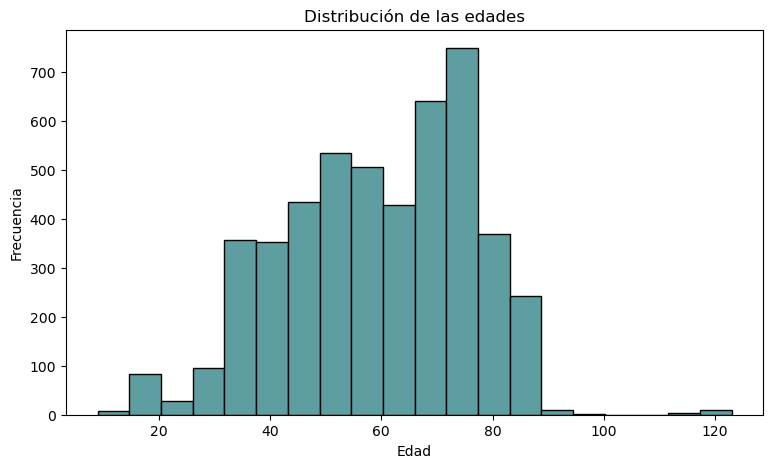

In [382]:
#Histograma de la moda, media.
moda = df_limpio['Age'].mode().values[0]
media = df_limpio['Age'].mean()
mediana = df_limpio['Age'].median()

resumen = pd.DataFrame({'Medida': ['Moda', 'Media', 'Mediana'], 'Valor': [moda, media, mediana]})


plt.figure(figsize=(9, 5))
plt.hist(df_limpio['Age'], bins=20, color='cadetblue', edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de las edades')
plt.show()




#### Histograma de Distribución de las variables Systolic y Diastolic en un histograma de frecuencia
Este gráfico presenta dos histogramas en un diseño de subplots, proporcionando una visualización clara de la distribución de las variables Systolic (presión sistólica) y Diastolic (presión diastólica) en tus datos.

Histograma de Systolic (izquierda): Muestra la frecuencia de los valores de presión sistólica agrupados en intervalos definidos. Cada barra representa la cantidad de datos que caen dentro de un rango específico de presión sistólica. Este histograma te permite observar cómo se distribuyen los valores de presión sistólica, identificar posibles picos (rangos de valores con alta frecuencia) y asymetrías en la distribución.

Histograma de Diastolic (derecha): Similar al histograma de presión sistólica, este gráfico ilustra la frecuencia de los valores de presión diastólica en intervalos de rango. Ayuda a visualizar la distribución de los valores diastólicos, permitiéndote ver la forma general de la distribución, incluyendo cualquier sesgo o anomalías.


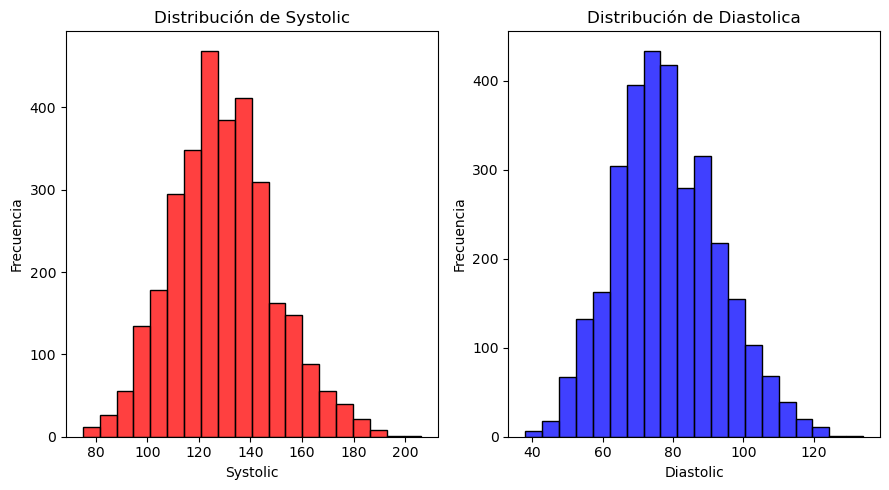

In [384]:
plt.figure(figsize=(9, 5))

# Histograma para la variable 'Systolic'
plt.subplot(1, 2, 1)
sns.histplot(df_unido['Systolic'], kde=False, bins=20, color='red')
plt.title('Distribución de Systolic')
plt.xlabel('Systolic')
plt.ylabel('Frecuencia')

# Histograma para la variable 'Diastolic'
plt.subplot(1, 2, 2)
sns.histplot(df_unido['Diastolic'], kde=False, bins=20, color='blue')
plt.title('Distribución de Diastolica')
plt.xlabel('Diastolic')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

#### El análisis bivariado es una técnica estadística que se utiliza para investigar la relación entre dos variables. A diferencia del análisis univariado, que se centra en una sola variable, el análisis bivariado examina cómo dos variables interactúan entre sí. 


#### Línea de tendencia 
examina la relación entre dos variables numéricas: la edad y la presión sistólica. De manera general, en este caso, se agrupan las edades en rangos y se calcula la media de la presión sistólica en cada grupo de edad, lo que permite visualizar cómo cambia la presión sistólica en función de la edad. La línea conecta los puntos que representan el promedio de la presión sistólica en cada grupo de edad, lo permite observar cómo la presión sistólica varía a medida que las personas envejecen. 
Tendencia: Si la línea tiene una pendiente ascendente, indica que a medida que la edad aumenta, el promedio de la presión sistólica también aumenta. Si es descendente, significaría que la presión sistólica disminuye con la edad.
Relación: Este gráfico muestra de manera visual la relación entre la variable edad (agrupada) y la variable presión sistólica, destacando las tendencias promedias.  

/tmp/ipykernel_67294/2957422636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['Age_Group'] = pd.cut(df_limpio['Age'], bins=[40, 50, 60, 70, 80, 90], labels=['40-50', '51-60', '61-70', '71-80', '81-90'])
/tmp/ipykernel_67294/2957422636.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_grouped = df_limpio.groupby('Age_Group')['Systolic'].mean().reset_index()


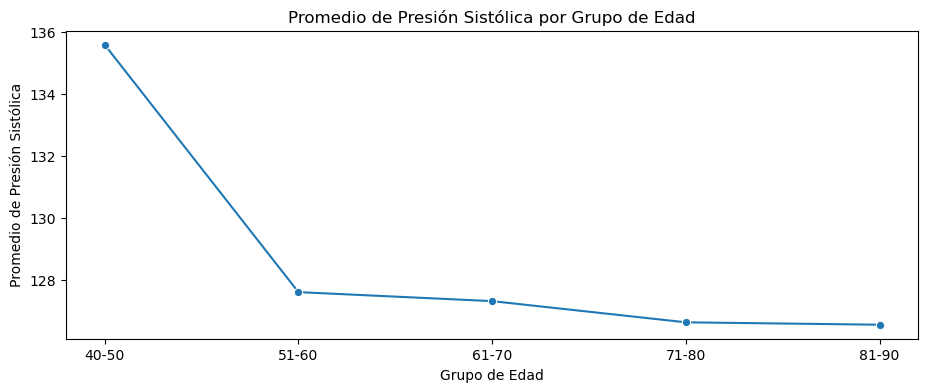

In [403]:


df_limpio['Age_Group'] = pd.cut(df_limpio['Age'], bins=[40, 50, 60, 70, 80, 90], labels=['40-50', '51-60', '61-70', '71-80', '81-90'])

age_grouped = df_limpio.groupby('Age_Group')['Systolic'].mean().reset_index()

plt.figure(figsize=(11, 4))
sns.lineplot(x='Age_Group', y='Systolic', data=age_grouped, marker='o')
plt.title('Promedio de Presión Sistólica por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Promedio de Presión Sistólica')
plt.show()



#### Boxplot Muestra la distribución, como varía la presión sistólica en diferentes grupos de edad. 
Los datos se agrupan en rangos de edad (0-20, 21-40, 41-60, etc.), y para cada grupo, el boxplot muestra:

La mediana (línea dentro de la caja).
El rango intercuartílico (Q1 a Q3, la caja).
Valores atípicos (puntos fuera de los "bigotes").
Los "bigotes" representan la dispersión de los datos sin considerar los outliers.
Puedes ver si la presión tiende a aumentar en grupos de mayor edad, o si hay mucha variabilidad dentro de un grupo.

/tmp/ipykernel_67294/836127064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['Age_Group'] = pd.cut(df_limpio['Age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])


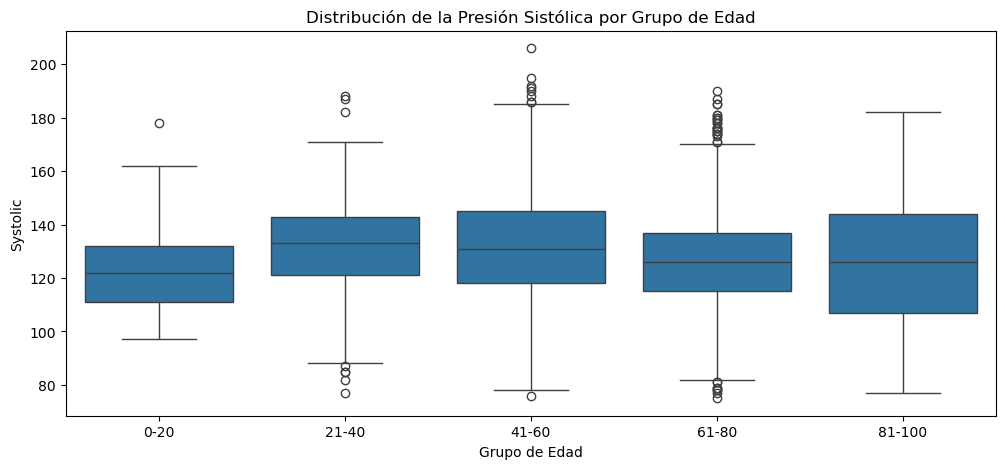

In [405]:
df_limpio['Age_Group'] = pd.cut(df_limpio['Age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])

plt.figure(figsize=(12, 5))
sns.boxplot(x='Age_Group', y='Systolic', data=df_limpio)
plt.title('Distribución de la Presión Sistólica por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Systolic')
plt.show()


#### Boxplot para comparar la distribución de la presión diastólica entre diferentes categorías de género. 
Cada boxplot representa la distribución de los valores de presión diastólica para cada categoría de género, proporcionando una visión clara de cómo se comparan estos valores entre los grupos.
Mediana: La línea dentro de la caja representa la mediana de la diastólica por cada género.
Cuartiles: Las cajas representan el rango intercuartílico, que contiene el 50% de los datos.El límite inferior de la caja es el primer cuartil (Q1) y el límite superior es el tercer cuartil (Q3). La altura de la caja muestra la variabilidad de la presión diastólica dentro de cada categoría de género. 
Valores atípicos: los puntos fuera pueden indicar outliers, o puede indicar una distribución más dispersa.

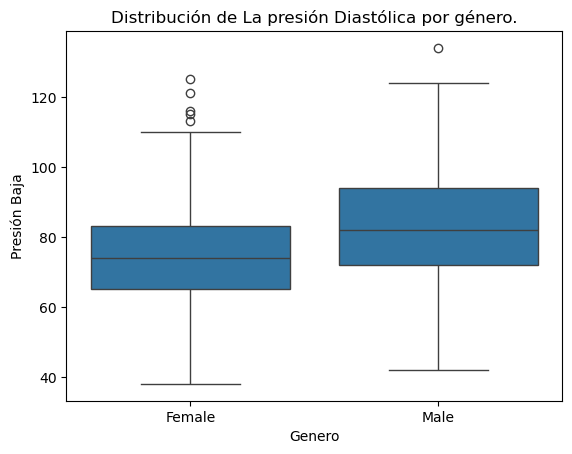

In [291]:
plt.title('Distribución de La presión Diastólica por género.')
sns.boxplot(x='GenderId', 
                y= 'Diastolic', data= df_limpio)
plt.xlabel('Genero')
plt.ylabel('Presión Baja')
plt.show()

#### Barplot que visualiza la presión sistólica promedio para diferentes géneros. 
Cada barra representa la media de la presión sistólica en una categoría de género específica, permitiendo una comparación clara entre los grupos.
Ayuda a detectar patrones o tendencias en los datos, como si hay diferencias notables en la presión sistólica promedio entre géneros.

/tmp/ipykernel_67294/689890691.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GenderId', y='Systolic', data=df_limpio, palette=colores)


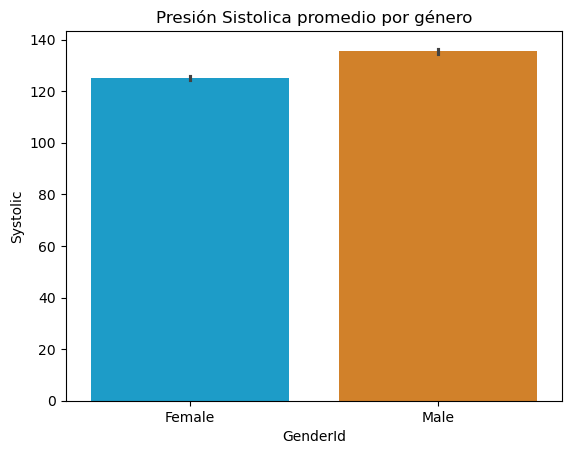

In [294]:
colores = ['#00AAE4', '#ED820E'] 
sns.barplot(x='GenderId', y='Systolic', data=df_limpio, palette=colores)
plt.title('Presión Sistolica promedio por género')
plt.show()
